1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

# Load Data

In [2]:
import pandas as pd
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
original_data = pd.read_csv(link, header = None)
columnname = ["Id", "Thickness", "Size", "Shape", "Adhesion", "Epithelial_Size", "Bare_Nuclei", "Chromatin",
             "Normal_Nucleoli", "Mitoses", "Class"]
original_data.columns = columnname

# Get to know the data

In [3]:
original_data.head()

,Id,Thickness,Size,Shape,Adhesion,Epithelial_Size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
original_data.shape

(699, 11)

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Id                 699 non-null int64
Thickness          699 non-null int64
Size               699 non-null int64
Shape              699 non-null int64
Adhesion           699 non-null int64
Epithelial_Size    699 non-null int64
Bare_Nuclei        699 non-null object
Chromatin          699 non-null int64
Normal_Nucleoli    699 non-null int64
Mitoses            699 non-null int64
Class              699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# 1. Inf Value

In [6]:
# replace any inf value with nan
import numpy as np
def ReplaceInf(df, subset = columnname):
    # subset is a list
    lst = [np.inf, -np.inf]
    to_replace = dict((v, lst) for v in subset)
    df = df.replace(to_replace, np.nan)
    return df

In [8]:
data = ReplaceInf(original_data)

# 2. Missing Value
## 2.1 Check if there is any missing value

In [9]:
data.isnull().any()

Id                 False
Thickness          False
Size               False
Shape              False
Adhesion           False
Epithelial_Size    False
Bare_Nuclei        False
Chromatin          False
Normal_Nucleoli    False
Mitoses            False
Class              False
dtype: bool

## 2.2 Calculate the portion of missing value

In [10]:
def describe_null(df):
    notnull = [len(df)-i for i in df.count(0)]
    notnull_ptg = [1.0*(len(df)-i)/len(df) for i in df.count(0)]
    missing_df = pd.DataFrame({'total number of missing values': notnull,
                                'missing percentage': notnull_ptg,
                                'data type': df.dtypes},
                                index = df.columns.tolist())
    return missing_df

In [11]:
describe_null(data)

,data type,missing percentage,total number of missing values
Id,int64,0.0,0
Thickness,int64,0.0,0
Size,int64,0.0,0
Shape,int64,0.0,0
Adhesion,int64,0.0,0
Epithelial_Size,int64,0.0,0
Bare_Nuclei,object,0.0,0
Chromatin,int64,0.0,0
Normal_Nucleoli,int64,0.0,0
Mitoses,int64,0.0,0


## 2.3 Remove missing value or replace missing value

In [12]:
# option 1: drop
data = data.dropna() # drop rows with missing values

# option 2: interpolate
# data = data.interpolate(method='values')

# 3. Data type check (convert to numeric or remove)

In [13]:
def isValid(x):
    try:
        y = float(x)
        return True
    except:
        return False

In [14]:
isValid(data)

False

In [15]:
# remove non-numerical samples and convert values to float
data['Valid'] = data['Bare_Nuclei'].apply(isValid)
data = data[data['Valid'] == True]
data = data.drop('Valid',axis=1)
data = data.applymap(float)

In [16]:
# convert to binary labels
data['Class'] = data['Class'].apply(lambda x: 0 if x == 2 else 1)
class_count = data['Class'].value_counts()
print "Total entries ",original_data.shape[0],"Valid entries ",data.shape[0]
print "Classes ---"
print class_count

Total entries  699 Valid entries  683
Classes ---
0    444
1    239
Name: Class, dtype: int64


## 3.1 Data balance

<Container object of 2 artists>

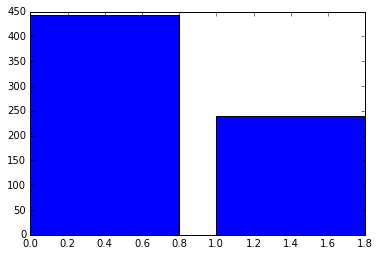

In [20]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(class_count)),class_count)

# 4. Outliers

In [114]:
data.describe()

,Id,Thickness,Size,Shape,Adhesion,Epithelial_Size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


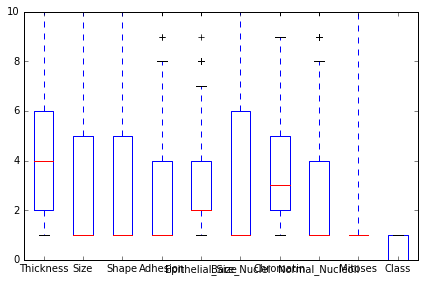

In [28]:
# plot bar to visualize all the data
%matplotlib inline
data[columnname[1:]].plot.box()
plt.tight_layout() 
plt.show()

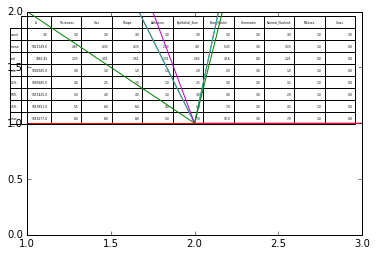

In [27]:
# plot describe table in the figure
from pandas.tools.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(data[1:4].describe(), 2), loc='upper right')
data[1:4].plot(ax=ax, ylim=(0, 2), legend=None)

# 5. Categorical Features

## 5.1 Check number of unique value

<Container object of 10 artists>

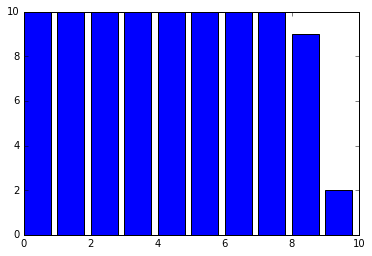

In [158]:
unique_values = [len(np.unique(data[i])) for i in data]
plt.bar(range(data.shape[1]-1), unique_values[1:])

## 5.2 Convert categorical features

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
s = OneHotEncoder(categorical_features = [1])
s

OneHotEncoder(categorical_features=[1], dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [234]:
s.fit(data)

OneHotEncoder(categorical_features=[1], dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [271]:
data_nocat = s.transform(data)

# 6. Normalize data

In [278]:
from sklearn.preprocessing import normalize
normalize(data_nocat, axis = 0)

<683x20 sparse matrix of type '<type 'numpy.float64'>'
	with 7069 stored elements in Compressed Sparse Column format>


# 7. Remove features with low variance

In [269]:
# remove all features that are either one or zero (on or off) in more than 80% of the samples
from sklearn.feature_selection import VarianceThreshold
p = 0.8
sel = VarianceThreshold(threshold=p*(1-p))
sel.fit_transform(data)

array([[  1.00002500e+06,   5.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.00294500e+06,   5.00000000e+00,   4.00000000e+00, ...,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.01542500e+06,   3.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  8.88820000e+05,   5.00000000e+00,   1.00000000e+01, ...,
          1.00000000e+01,   2.00000000e+00,   1.00000000e+00],
       [  8.97471000e+05,   4.00000000e+00,   8.00000000e+00, ...,
          6.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  8.97471000e+05,   4.00000000e+00,   8.00000000e+00, ...,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00]])

# 8. Split data into training and testing set

In [30]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data, test_size = 0.25, train_size = 0.75, random_state = 123)

# 9. Check features from each group

## 9.1 Feature distribution

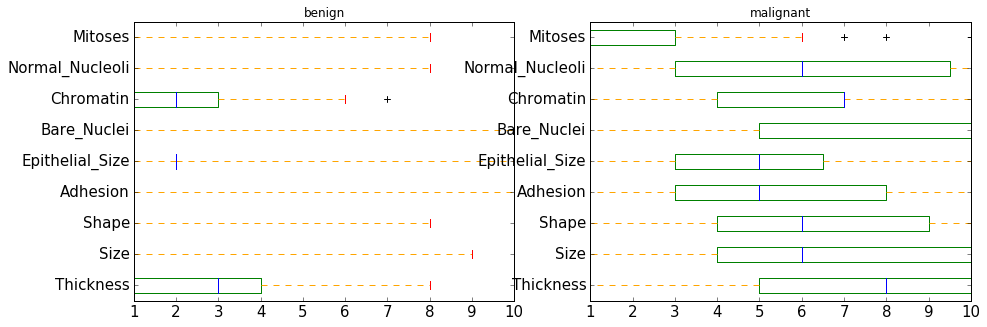

In [249]:
color = dict(boxes='Green', whiskers='Orange',
             medians='Blue', caps='Red')
fig, axes = plt.subplots(figsize=(15, 5),nrows=1, ncols=2)
data[data['Class']==0].ix[:,1:-1].plot.box(color=color,vert=False,ax=axes[0],title='benign',fontsize=15)
data[data['Class']==1].ix[:,1:-1].plot.box(color=color,vert=False,ax=axes[1],title='malignant',fontsize=15)
plt.show()

## 9.2 Use PCA to check separability 

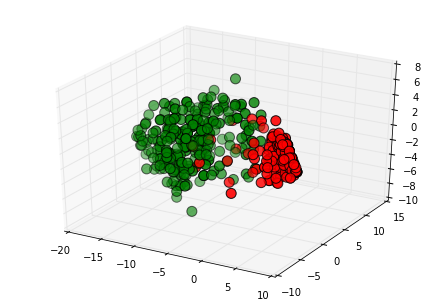

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
colors = ['r', 'g']
features = data.ix[:,1:-1]

##### two components #####
# X2d = PCA(n_components=2).fit_transform(features)
# plt.scatter(X2d[:,0], X2d[:,1], 100, c=[colors[int(i)] for i in data['Class']])

##### three components #####
X2d = PCA(n_components=3).fit_transform(features)
ax = Axes3D(plt.gcf())
ax.scatter(X2d[:,0], X2d[:,1], X2d[:,2], s=100, c=[colors[int(i)] for i in data['Class']])

## 9.3 Feature correlation

### 9.3.1 correlation 1

In [259]:
# Correlation matrix
corr = data.ix[:,1:].corr()
corr

,Thickness,Size,Shape,Adhesion,Epithelial_Size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Epithelial_Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal_Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


### 9.3.2 correlation 2

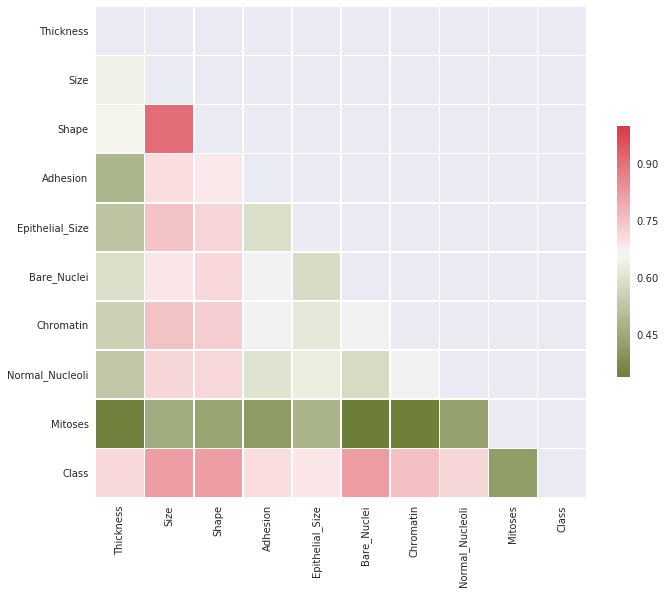

In [260]:
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### 9.3.3 correlation 3

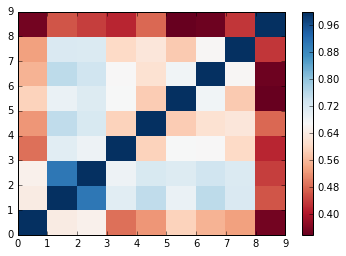

In [244]:
from sklearn.preprocessing import normalize
XY = np.asarray(data)[:,1:]
# separate X and Y
X = XY[:,:-1]
Y = XY[:,-1]
# Normalize X
X_normed = normalize(X,axis=0)
plt.pcolor(np.abs(np.corrcoef(X.T)), cmap = 'RdBu')
plt.colorbar()
plt.show()

### 9.3.4 correlation 4

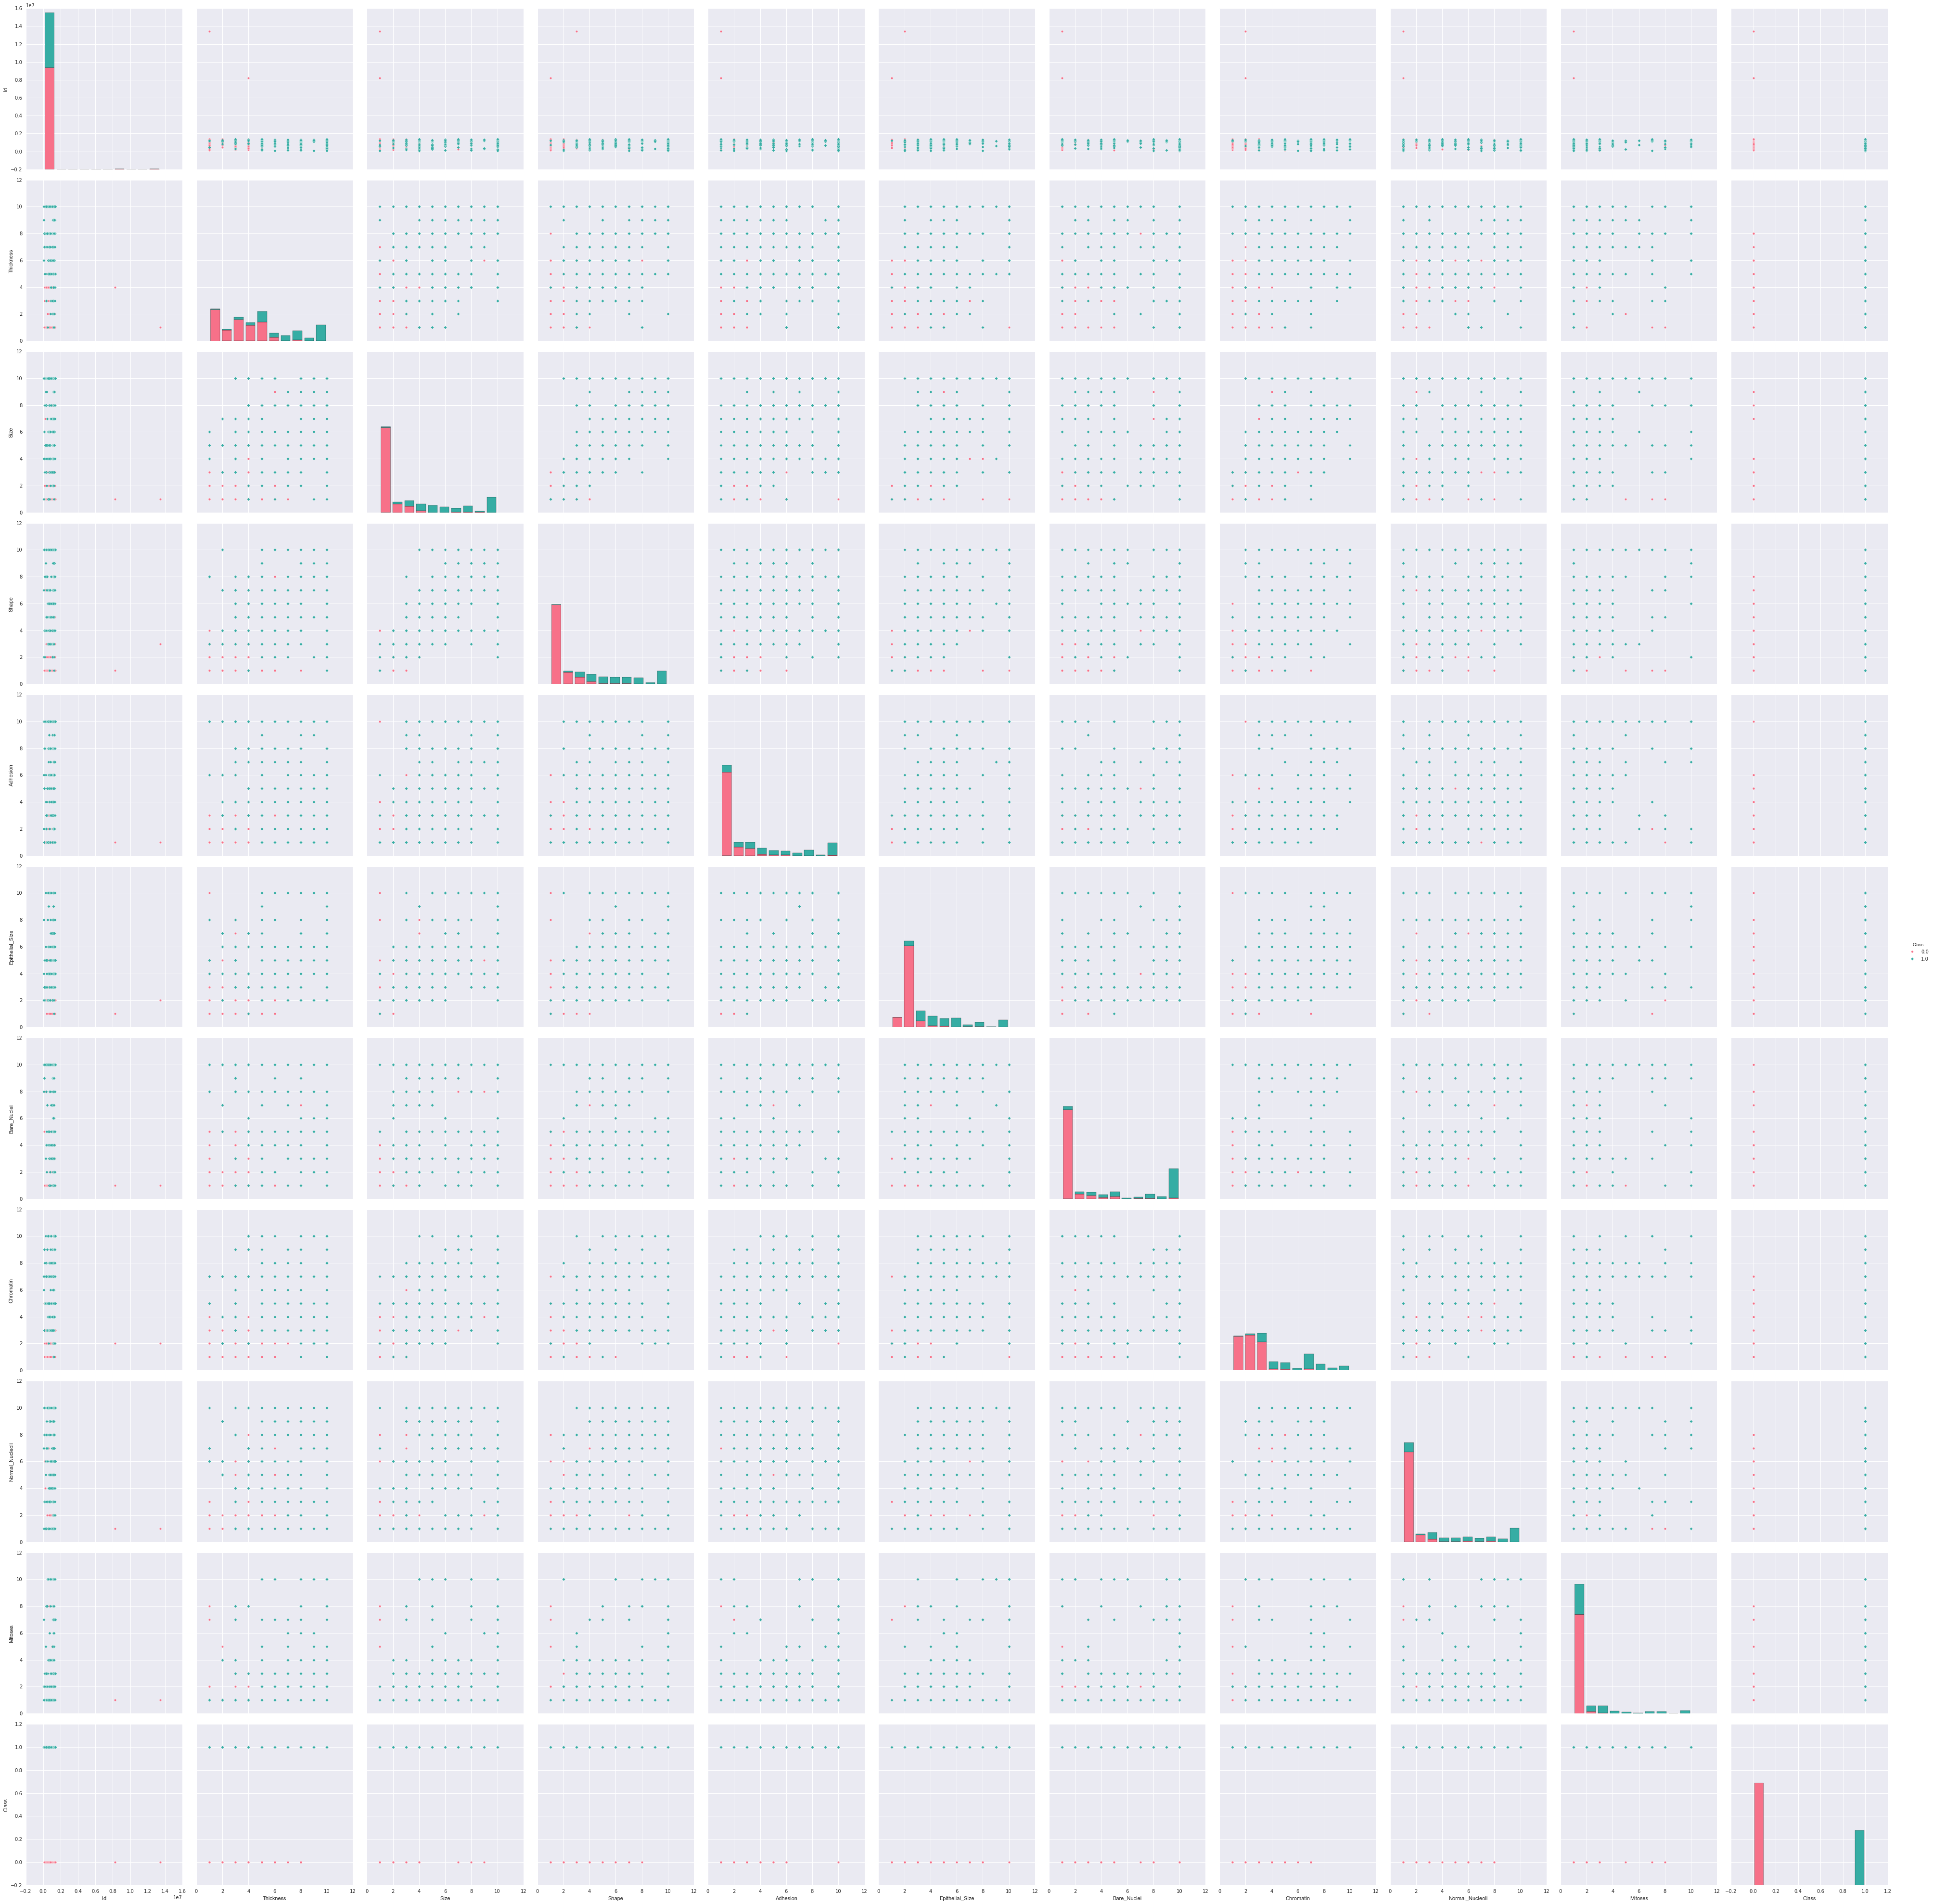

In [264]:
sns.pairplot(data,hue='Class', size=5, palette="husl", markers=["o", "D"])

# 10. Feature selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153fb090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e48d0d0>]], dtype=object)

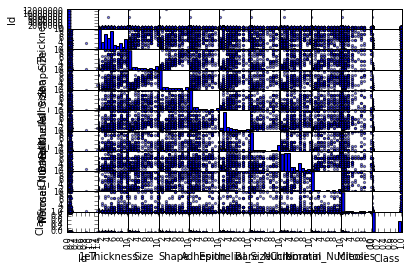

In [23]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)

## 10.1 Recursive Feature Elimination

In [33]:
import sklearn.feature_selection
from sklearn.svm import LinearSVC

In [47]:
train_feature = train[columnname[1:-1]]
train_class = train['Class']

In [94]:
estimator = LinearSVC(C=0.01, penalty="l1", dual=False)

# Create the RFE object and rank each pixel
rfe = sklearn.feature_selection.RFECV(estimator, step=1, cv=5, scoring=None, estimator_params=None, verbose=0)
rfe.fit(train_feature, train_class)
# A mask of selected features
rfe.support_

array([False,  True,  True, False, False,  True, False,  True, False], dtype=bool)

In [78]:
# Feature ranking
rfe.ranking_

array([6, 1, 1, 2, 5, 1, 4, 1, 3])

## 10.2 L1-based Feature Selection

In [96]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_feature, train_class)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train_feature)
X_new.shape

(512, 5)

### The limitation of L1-based sparse models is that faced with a group of very correlated features, they will select only one. To mitigate this problem, it is possible to use randomization techniques, reestimating the sparse model many times perturbing the design matrix or sub-sampling data and counting how many times a given regressor is selected

## 10.3 Tree-based Feature Selection

### 10.3.1 ExtraTreesClassifier

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train_feature, train_class)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

Feature ranking:
1. feature 5 (0.264416)
2. feature 1 (0.164240)
3. feature 2 (0.157196)
4. feature 7 (0.122972)
5. feature 6 (0.080772)
6. feature 0 (0.078249)
7. feature 3 (0.061814)
8. feature 4 (0.056403)
9. feature 8 (0.013937)


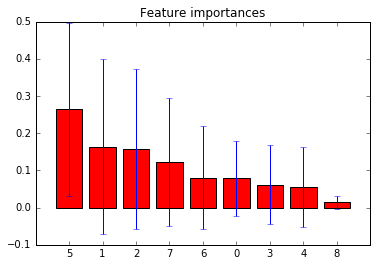

In [110]:
# plot feature importance
indices = np.argsort(clf.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_feature.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], clf.feature_importances_[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_feature.shape[1]), clf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_feature.shape[1]), indices)
plt.xlim([-1, train_feature.shape[1]])
plt.show()

In [103]:
# transform data based on feature importance
model = SelectFromModel(clf, prefit=True)
train_feature_new = model.transform(train_feature)
train_feature_new.shape  

(512, 4)

### 10.3.2 GradientBoostingClassfier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=250, learning_rate=1.0,max_depth=1, 
                                 random_state=0).fit(train_feature, train_class)
clf.feature_importances_ 

array([ 0.068,  0.148,  0.096,  0.188,  0.124,  0.084,  0.176,  0.092,
        0.024])

Feature ranking:
1. feature 3 (0.188000)
2. feature 6 (0.176000)
3. feature 1 (0.148000)
4. feature 4 (0.124000)
5. feature 2 (0.096000)
6. feature 7 (0.092000)
7. feature 5 (0.084000)
8. feature 0 (0.068000)
9. feature 8 (0.024000)


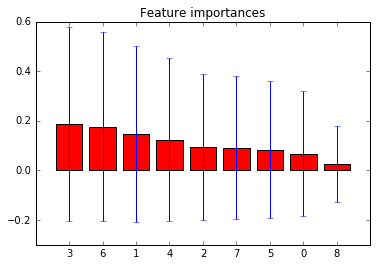

In [147]:
# plot feature importance
estimators2 = [temp.pop() for temp in clf.estimators_.tolist()]
std = np.std([tree.feature_importances_ for tree in estimators2],
             axis=0)
indices = np.argsort(clf.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_feature.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], clf.feature_importances_[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_feature.shape[1]), clf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_feature.shape[1]), indices)
plt.xlim([-1, train_feature.shape[1]])
plt.show()

# 11. Build models

## 11.1 Compare cross-validation scores across models

In [173]:
# LinearSVC
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
cvKfold = StratifiedKFold(train_class, n_folds=10, shuffle=True, random_state=True)

LSVC_scores = cross_val_score(lsvc, train_feature, train_class, cv=cvKfold) 
print('LSVC: Mean Accuracy of cross-validation', np.mean(LSVC_scores))
print('LSVC: Mean STD of cross-validation accuracy', np.std(LSVC_scores))

('LSVC: Mean Accuracy of cross-validation', 0.95899999999999985)
('LSVC: Mean STD of cross-validation accuracy', 0.022212129529265129)


In [179]:
# K Neighbors
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
cvKfold = StratifiedKFold(train_class, n_folds=10, shuffle=True, random_state=True)

KNC_scores = cross_val_score(KNC, train_feature, train_class, cv=cvKfold) 
print('KNC: Mean Accuracy of cross-validation', np.mean(KNC_scores))
print('KNC: Mean STD of cross-validation accuracy', np.std(KNC_scores))

('KNC: Mean Accuracy of cross-validation', 0.97076923076923083)
('KNC: Mean STD of cross-validation accuracy', 0.021612510074398496)


In [184]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=30)
cvKfold = StratifiedKFold(train_class, n_folds=10, shuffle=True, random_state=True)

Bagging_scores = cross_val_score(bagging, train_feature, train_class, cv=cvKfold) 
print('Bagging: Mean Accuracy of cross-validation', np.mean(Bagging_scores))
print('Bagging: Mean STD of cross-validation accuracy', np.std(Bagging_scores))

('Bagging: Mean Accuracy of cross-validation', 0.96876923076923094)
('Bagging: Mean STD of cross-validation accuracy', 0.019651399817644025)


In [187]:
# Ada Boosting
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ada_boosting = AdaBoostClassifier(n_estimators=100)
cvKfold = StratifiedKFold(train_class, n_folds=10, shuffle=True, random_state=True)

Ada_Boosting_scores = cross_val_score(ada_boosting, train_feature, train_class, cv=cvKfold) 
print('Ada Boosting: Mean Accuracy of cross-validation', np.mean(Ada_Boosting_scores))
print('Ada Boosting: Mean STD of cross-validation accuracy', np.std(Ada_Boosting_scores))

('Boosting: Mean Accuracy of cross-validation', 0.95723076923076922)
('Boosting: Mean STD of cross-validation accuracy', 0.020784040304063757)


In [191]:
# Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier

GTB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
cvKfold = StratifiedKFold(train_class, n_folds=10, shuffle=True, random_state=True)
GTB_scores = cross_val_score(GTB, train_feature, train_class, cv=cvKfold) 
print('Gradient Boosting: Mean Accuracy of cross-validation', np.mean(GTB_scores))
print('Gradient Boosting: Mean STD of cross-validation accuracy', np.std(GTB_scores))

('Boosting: Mean Accuracy of cross-validation', 0.95507692307692305)
('Boosting: Mean STD of cross-validation accuracy', 0.023263858248186498)


In [210]:
# Random Forrest

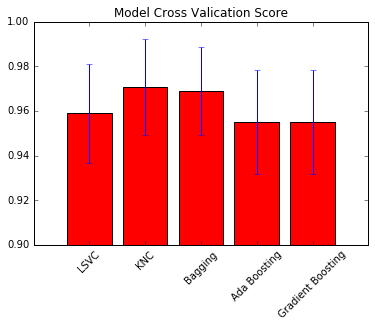

In [198]:
# bar plot to compare the performance
model_mean = [np.mean(LSVC_scores), np.mean(KNC_scores), np.mean(Bagging_scores), np.mean(Ada_Boosting_scores),
             np.mean(GTB_scores)]
model_std = [np.std(LSVC_scores), np.std(KNC_scores), np.std(Bagging_scores), np.std(Ada_Boosting_scores),
             np.std(GTB_scores)]

plt.figure()
plt.title("Model Cross Valication Score")
plt.bar(range(len(model_mean)), model_mean,
       color="r", yerr=model_std, align="center")
plt.xticks(range(len(model_mean)), ['LSVC', 'KNC', 'Bagging', 'Ada Boosting', 'Gradient Boosting'], rotation=45)
plt.ylim([0.9, 1])
plt.show()

## 11.2 Overfitting/Underfitting: learning curves

### A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

### Every estimator has its advantages and drawbacks. Its generalization error can be decomposed in terms of bias, variance and noise. The bias of an estimator is its average error for different training sets. The variance of an estimator indicates how sensitive it is to varying training sets. Noise is a property of the data.

In [200]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


### Both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. 

### High bias, can be improved with more complex model

<module 'matplotlib.pyplot' from '/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

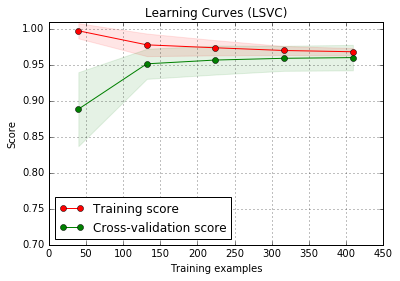

In [205]:
title = "Learning Curves (LSVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(len(train_feature), n_iter=100,
                                   test_size=0.2, random_state=0)

plot_learning_curve(lsvc, title, train_feature, train_class, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


<module 'matplotlib.pyplot' from '/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

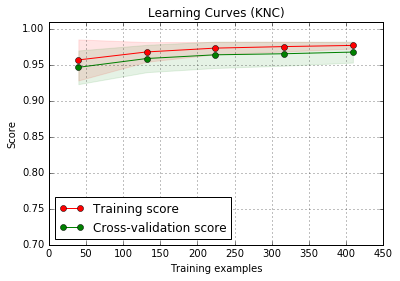

In [206]:
title = "Learning Curves (KNC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(len(train_feature), n_iter=100,
                                   test_size=0.2, random_state=0)

plot_learning_curve(KNC, title, train_feature, train_class, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


<module 'matplotlib.pyplot' from '/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

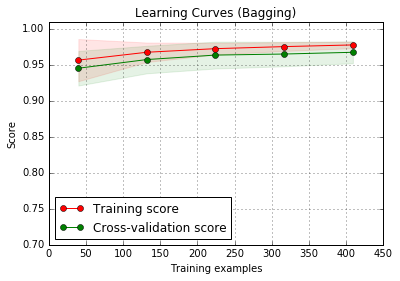

In [207]:
title = "Learning Curves (Bagging)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(len(train_feature), n_iter=100,
                                   test_size=0.2, random_state=0)

plot_learning_curve(bagging, title, train_feature, train_class, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


### The training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization

<module 'matplotlib.pyplot' from '/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

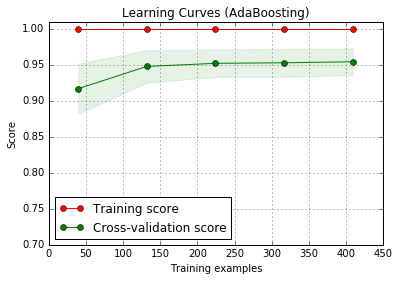

In [211]:
title = "Learning Curves (AdaBoosting)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(len(train_feature), n_iter=100,
                                   test_size=0.2, random_state=0)

plot_learning_curve(ada_boosting, title, train_feature, train_class, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


<module 'matplotlib.pyplot' from '/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

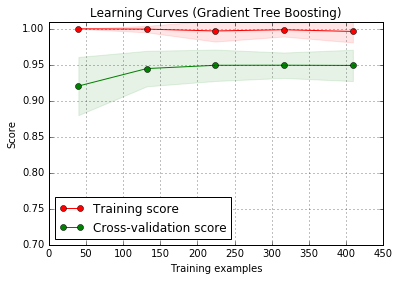

In [209]:
title = "Learning Curves (Gradient Tree Boosting)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(len(train_feature), n_iter=100,
                                   test_size=0.2, random_state=0)

plot_learning_curve(GTB, title, train_feature, train_class, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


## Model comparison

In [218]:
test_feature = test[columnname[1:-1]]
test_class = test['Class']

('1st sample from test dataset classified as:', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1]))
('actual class label:', 154    0
687    0
80     0
269    0
136    0
573    0
81     0
476    0
59     1
216    0
45     0
170    0
548    0
428    0
296    0
520    0
168    0
587    0
141    0
206    1
187    1
473    0
358    1
380    0
664    0
11     0
623    0
622    0
227    1
392    0
      ..
630    0
649    0
176    0
459    0
208    0
618    0
124    1
42     1
104   

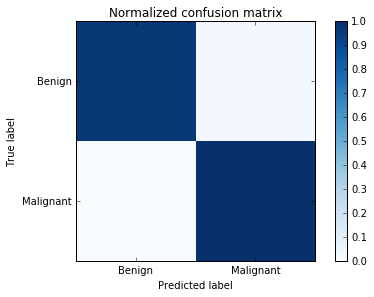

In [236]:
from sklearn import metrics
# fit model
## RF model with 70 trees
## lda_clf = sklearn.ensemble.RandomForestClassifier(70)
#lda_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)
lsvc.fit(train_feature, train_class)
# sklearn.lda.LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', lsvc.predict(test_feature))
print('actual class label:', test_class)
# confusion matrix
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(test_class, lsvc.predict(test_feature)))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = lsvc.predict(test_feature)
y_test = test_class
    
# Compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [237]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
target_names = ['benign', 'malignant']
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     benign       1.00      0.97      0.99       108
  malignant       0.95      1.00      0.98        63

avg / total       0.98      0.98      0.98       171



('1st sample from test dataset classified as:', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1]))
('actual class label:', 154    0
687    0
80     0
269    0
136    0
573    0
81     0
476    0
59     1
216    0
45     0
170    0
548    0
428    0
296    0
520    0
168    0
587    0
141    0
206    1
187    1
473    0
358    1
380    0
664    0
11     0
623    0
622    0
227    1
392    0
      ..
630    0
649    0
176    0
459    0
208    0
618    0
124    1
42     1
104   

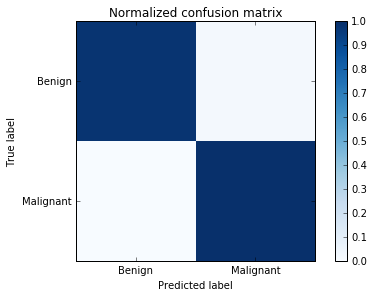

In [234]:
from sklearn import metrics
# fit model
## RF model with 70 trees
## lda_clf = sklearn.ensemble.RandomForestClassifier(70)
#lda_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)
KNC.fit(train_feature, train_class)
# sklearn.lda.LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', KNC.predict(test_feature))
print('actual class label:', test_class)
# confusion matrix
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(test_class, KNC.predict(test_feature)))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = KNC.predict(test_feature)
y_test = test_class
    
# Compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [235]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
target_names = ['benign', 'malignant']
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     benign       1.00      0.98      0.99       108
  malignant       0.97      1.00      0.98        63

avg / total       0.99      0.99      0.99       171



('1st sample from test dataset classified as:', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1]))
('actual class label:', 154    0
687    0
80     0
269    0
136    0
573    0
81     0
476    0
59     1
216    0
45     0
170    0
548    0
428    0
296    0
520    0
168    0
587    0
141    0
206    1
187    1
473    0
358    1
380    0
664    0
11     0
623    0
622    0
227    1
392    0
      ..
630    0
649    0
176    0
459    0
208    0
618    0
124    1
42     1
104   

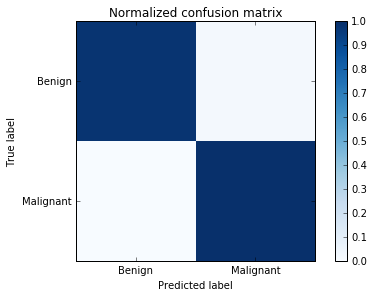

In [232]:
from sklearn import metrics
# fit model
## RF model with 70 trees
## lda_clf = sklearn.ensemble.RandomForestClassifier(70)
#lda_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)
bagging.fit(train_feature, train_class)
# sklearn.lda.LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', bagging.predict(test_feature))
print('actual class label:', test_class)
# confusion matrix
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(test_class, bagging.predict(test_feature)))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = bagging.predict(test_feature)
y_test = test_class
    
# Compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [233]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
target_names = ['benign', 'malignant']
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     benign       1.00      0.98      0.99       108
  malignant       0.97      1.00      0.98        63

avg / total       0.99      0.99      0.99       171



('1st sample from test dataset classified as:', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1]))
('actual class label:', 154    0
687    0
80     0
269    0
136    0
573    0
81     0
476    0
59     1
216    0
45     0
170    0
548    0
428    0
296    0
520    0
168    0
587    0
141    0
206    1
187    1
473    0
358    1
380    0
664    0
11     0
623    0
622    0
227    1
392    0
      ..
630    0
649    0
176    0
459    0
208    0
618    0
124    1
42     1
104   

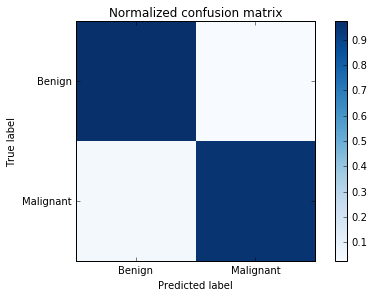

In [230]:
from sklearn import metrics
# fit model
## RF model with 70 trees
## lda_clf = sklearn.ensemble.RandomForestClassifier(70)
#lda_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)
ada_boosting.fit(train_feature, train_class)
# sklearn.lda.LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', ada_boosting.predict(test_feature))
print('actual class label:', test_class)
# confusion matrix
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(test_class, ada_boosting.predict(test_feature)))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = ada_boosting.predict(test_feature)
y_test = test_class
    
# Compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [231]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
target_names = ['benign', 'malignant']
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     benign       0.97      0.97      0.97       108
  malignant       0.95      0.95      0.95        63

avg / total       0.96      0.96      0.96       171



('1st sample from test dataset classified as:', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1]))
('actual class label:', 154    0
687    0
80     0
269    0
136    0
573    0
81     0
476    0
59     1
216    0
45     0
170    0
548    0
428    0
296    0
520    0
168    0
587    0
141    0
206    1
187    1
473    0
358    1
380    0
664    0
11     0
623    0
622    0
227    1
392    0
      ..
630    0
649    0
176    0
459    0
208    0
618    0
124    1
42     1
104   

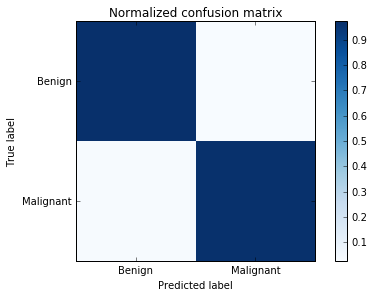

In [227]:
from sklearn import metrics
# fit model
## RF model with 70 trees
## lda_clf = sklearn.ensemble.RandomForestClassifier(70)
#lda_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)
GTB.fit(train_feature, train_class)
# sklearn.lda.LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', GTB.predict(test_feature))
print('actual class label:', test_class)
# confusion matrix
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(test_class, GTB.predict(test_feature)))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = GTB.predict(test_feature)
y_test = test_class
    
# Compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [229]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
target_names = ['benign', 'malignant']
print classification_report(y_test, y_pred, target_names=target_names)

             precision    recall  f1-score   support

     benign       0.98      0.97      0.98       108
  malignant       0.95      0.97      0.96        63

avg / total       0.97      0.97      0.97       171



ROC AUC: 0.99


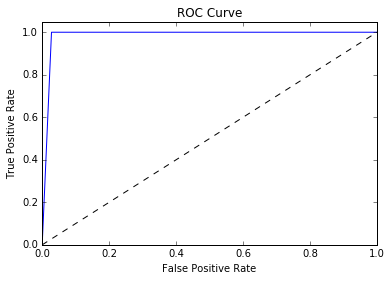

In [251]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

fprk,tprk,_=roc_curve(y_test,y_pred)
roc_auc = auc(fprk,tprk)
print 'ROC AUC: %0.2f' % roc_auc

plt.plot(fprk,tprk)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()